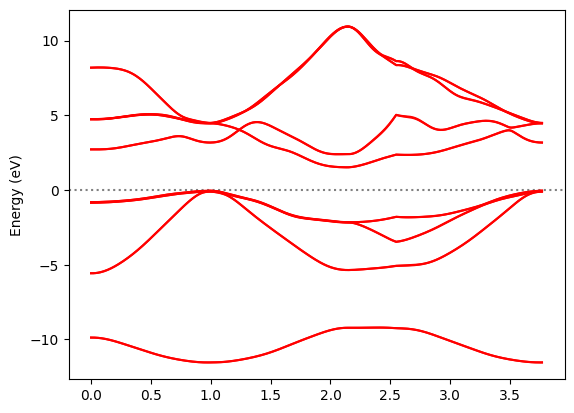

In [17]:
# Import the necessary packages and modules
import numpy as np
import matplotlib.pyplot as plt

# Define the function for plot band structure of graphene
# name: name of band structure file
# nbnd: number of bands
# nks: number of k-points 
# efermi: the Fermi energy
# k1,k2,k3,k4: the high-symmetry points in BZ
def r_band(name,nbnd,nks,efermi):
    # Open file of band structure
    f = open(name, 'r')
    f_band = [line for line in f.readlines() if line.strip()]
    f.close()  
    # Read k-points
    ks = []
    for ik in range(nks):
        ks.append(float(f_band[ik].split()[0])) 
    # Set high-symmetry points in BZ
    # gG1=ks[k1]; K=ks[k2]; M=ks[k3]; gG2=ks[k4]
    # Read band index at each k-point
    band = []
    for ib in range(nbnd):
        band.append([])
        for ik in range(nks):
            tmp = f_band[ib*nks+ik].split()[1]
            band[ib].append(float(tmp)-efermi)
    # Read eigen-energy at each band index
    ener = []
    for ik in range(nks):
        ener.append([])
        for ib in range(nbnd):
            tmp = band[ib][ik]
            ener[ik].append(float(tmp))
    # Return the k-points and energies
    return ks, ener

# Band structure from the output of Wannier90
ks_w90, ener_w90 = r_band('alp_band.dat',16,379, 5.0231) #,0,100,150,237)
# Band structrue from the output of Quantum ESPRESSO
# ks_dft, ener_dft = r_band('gr.bands.gnu',16,91,-1.6790,0,40,60,90)
# Unit of k points from DFT (2*pi/a)
# k2 = 2*np.pi/2.4639055825
# Convert the unit of ks_dft to 1/Angstrom
# ks_k2 = np.asarray(ks_dft)*k2

# Create figure object
plt.figure()
# Plot dotted line at Fermi energy
plt.axhline(0, c='gray', ls=':')
# Plot dotted lines at high-symmetry points
# plt.axvline(ks_w90[100], c='gray')
# plt.axvline(ks_w90[150], c='gray')
# Plot band structure
# plt.plot(ks_k2, ener_dft, c='b')
plt.plot(ks_w90, ener_w90, c='r')#, ls = 'none', marker='-', 
#         markersize=1, markevery=1, markerfacecolor='none',)
# Add the x and y-axis labels
plt.xlabel('')
plt.ylabel('Energy (eV)')
# Set the axis limits
# plt.xlim(ks_w90[0], ks_w90[237])
# plt.ylim (-20, 20)
# Add labels for high-symmetry points
# plt.xticks([ks_w90[0], ks_w90[100], ks_w90[150], ks_w90[237]],
#           ['$\Gamma$', 'K', 'M', '$\Gamma$'])
# Hide x-axis minor ticks
plt.tick_params(axis='x', which='minor', bottom=False, top=False)
# Save a figure to the pdf file
plt.savefig('plot-bands.pdf')
# Show plot
plt.show()

In [18]:
with open("alp_band.dat", "r") as f:
    f_band = [line for line in f.readlines() if line.strip()]